# Codificación de variables categóricas ordinales

En el conjunto de datos `datos_20.csv` existen datos  por localidad de grados académicos (`Grado`), población total (`POBTOT_BC`) y promedio de hijos nacidos vivos (`PROM_HNV_BC`); censados en el 2020.

Codificaremos la variable categórica y encontraremos un modelo lineal entre las variables `Grado` y `POBTOT_BC` con `PROM_HNV_BC`, veremos si la precisión del modelo varía con diferentes formas de codificar y si existe una correlación entre estas variables.

1. Importe los datos del archivo `datos_20.csv`

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [42]:
df = pd.read_csv('datos_20.csv')
df.head()

,Grado,POBTOT_BC,PROM_HNV_BC
0,Primaria,3.173729,1.154342
1,Primaria,5.278282,1.302897
2,Primaria,3.173729,1.759130
3,Primaria,5.221993,1.388040
4,Primaria,4.219874,1.420656


2. Codifique la variable `Grado` usando contraste polinómico lineal

In [43]:
df['Grado'].unique()

array(['Primaria', 'Secundaria', 'Primaria trunca', 'Preparatoria',
       'Licenciatura o superior', 'Sin escolaridad'], dtype=object)

In [44]:
grados_ordenados = ['Sin escolaridad', 'Primaria trunca', 'Primaria', 'Secundaria', 'Preparatoria', 'Licenciatura o superior']
n = df['Grado'].nunique()
lim = n-1 if n%2==0 else (n-1)//2
step = 2 if n%2==0 else 1
X=range(-lim,lim+1,step)
list(X)

[-5, -3, -1, 1, 3, 5]

In [45]:
a0 = 0
a1 = 1
Y=[a0+a1*x for x in X]
Y

[-5, -3, -1, 1, 3, 5]

In [46]:
grados_cod = {categoria:y for categoria,y in zip(grados_ordenados,Y)}
grados_cod

{'Sin escolaridad': -5,
 'Primaria trunca': -3,
 'Primaria': -1,
 'Secundaria': 1,
 'Preparatoria': 3,
 'Licenciatura o superior': 5}

In [47]:
df['grados_cod']=df['Grado'].map(grados_cod)
df.head()

,Grado,POBTOT_BC,PROM_HNV_BC,grados_cod
0,Primaria,3.173729,1.154342,-1
1,Primaria,5.278282,1.302897,-1
2,Primaria,3.173729,1.759130,-1
3,Primaria,5.221993,1.388040,-1
4,Primaria,4.219874,1.420656,-1


3. Obtenga una relación lineal usando la clase `LinearRegression` del paquete `sklearn.linear_model`, para la codificacón obtenida y la variable `PBTOT_BC` como variables independientes y la variable `PROM_HNV_BC` como variable dependiente. Posteriormente, grafique y mida la correlación.

In [48]:
regresion_lin = LinearRegression()
regresion_lin.fit(df[['POBTOT_BC', 'grados_cod']],df['PROM_HNV_BC'])
regresion_lin.score(df[['POBTOT_BC', 'grados_cod']],df['PROM_HNV_BC'])

0.13878507295191256

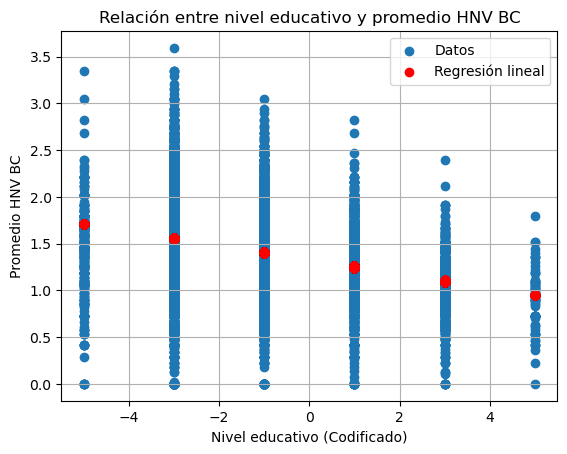

In [49]:
plt.scatter(df['grados_cod'], df['PROM_HNV_BC'], label='Datos')
plt.scatter(df['grados_cod'], regresion_lin.predict(df[['POBTOT_BC', 'grados_cod']]), label='Regresión lineal', color='red')
plt.legend()
plt.xlabel('Nivel educativo (Codificado)')
plt.ylabel('Promedio HNV BC')
plt.grid(True)
plt.title('Relación entre nivel educativo y promedio HNV BC')
plt.show()

4. Codifique de nuevo la variable `Grado` usando contrate polinómico cuadrático con una parábola cóncava.

In [50]:
n = len(grados_ordenados)
lim = n-1 if n%2==0 else (n-1)//2
step = 2 if n%2==0 else 1
X = range(-lim,lim+1,step)
list(X)

[-5, -3, -1, 1, 3, 5]

In [51]:
a2 = 1
a1 = 0.1
a0 = -a2*np.sum([x**2 for x in X])/n
Y=[a0+a1*x+a2*x**2 for x in X]
Y

[12.833333333333334,
 -2.966666666666667,
 -10.766666666666666,
 -10.566666666666666,
 -2.3666666666666654,
 13.833333333333334]

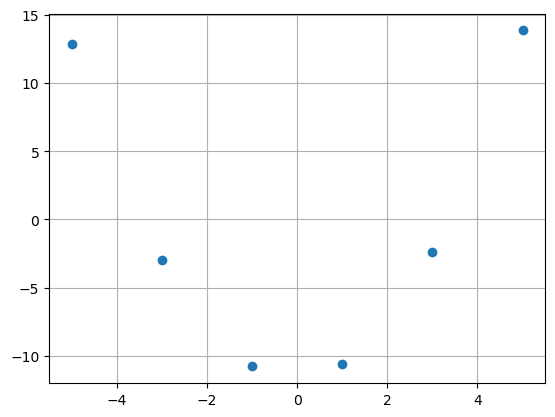

In [52]:
plt.scatter(X,Y)
plt.grid()

5. Obtenga de nuevo una regresión lineal incluyendo ahora la codificación cuadrática, es decir, las variables independientes serán `POBTOT_BC`, la codificación lineal y la codificación cuadrática. Grafique y mida la correlación, ¿Mejoró la correlación?

In [53]:
df['grados_cuad'] = df['Grado'].map({categoria:y for categoria,y in zip(grados_ordenados,Y)})
df.head()

,Grado,POBTOT_BC,PROM_HNV_BC,grados_cod,grados_cuad
0,Primaria,3.173729,1.154342,-1,-10.766667
1,Primaria,5.278282,1.302897,-1,-10.766667
2,Primaria,3.173729,1.759130,-1,-10.766667
3,Primaria,5.221993,1.388040,-1,-10.766667
4,Primaria,4.219874,1.420656,-1,-10.766667


In [54]:
regresion_cuad = LinearRegression()
regresion_cuad.fit(df[['POBTOT_BC', 'grados_cod', 'grados_cuad']],df['PROM_HNV_BC'])
regresion_cuad.score(df[['POBTOT_BC', 'grados_cod', 'grados_cuad']],df['PROM_HNV_BC'])

0.14561352237368852

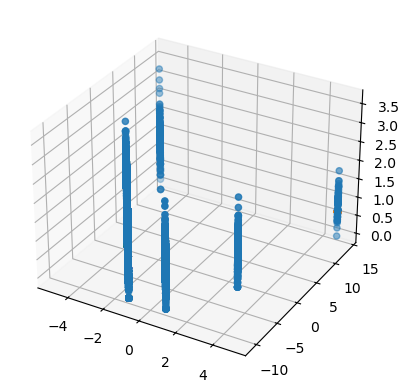

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['grados_cod'].values,df['grados_cuad'].values,df['PROM_HNV_BC'].astype('float'))
ax.scatter(df['grados_cod'].values,df['grados_cuad'].values,regresion_cuad.predict(df[['POBTOT_BC','grados_cod','grados_cuad']]),label='Regresión cuadrática')

plt.grid()

La correlación no mejoró significativamente

6. Finalmente, vuelva a codificar la variable `Grado` usando contraste polinómico cuadrático estrictamente creciente, esto es $X=\{0,1,2,\dots,n-1\}$.

In [56]:
a2 = 1
a1 = 10
a0 = -a2*np.sum([x**2 for x in X])/n
Y = [a0+a1*x+a2*x**2 for x in X]
Y

[-36.666666666666664,
 -32.666666666666664,
 -20.666666666666664,
 -0.6666666666666661,
 27.333333333333336,
 63.333333333333336]

7. En la última regresión lineal, las variables independientes serán solo `POBTOT_BC` y la codificación cuadrática creciente. Grafique y mida la correlación, ¿Mejoró la correlación?, ¿Existe correlación entre estas variables?

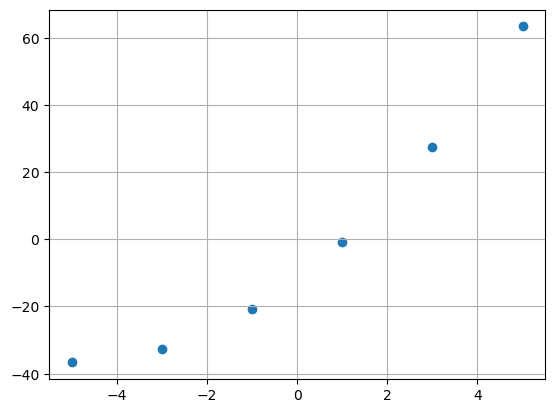

In [57]:
plt.scatter(X,Y)
plt.grid()

In [58]:
df['grados_cuad'] = df['Grado'].map({categoria:y for categoria,y in zip(grados_ordenados,Y)})
df.head()

,Grado,POBTOT_BC,PROM_HNV_BC,grados_cod,grados_cuad
0,Primaria,3.173729,1.154342,-1,-20.666667
1,Primaria,5.278282,1.302897,-1,-20.666667
2,Primaria,3.173729,1.759130,-1,-20.666667
3,Primaria,5.221993,1.388040,-1,-20.666667
4,Primaria,4.219874,1.420656,-1,-20.666667


In [59]:
regresion_lin = LinearRegression()
regresion_lin.fit(df[['POBTOT_BC', 'grados_cuad']],df['PROM_HNV_BC'])
regresion_lin.score(df[['POBTOT_BC', 'grados_cuad']],df['PROM_HNV_BC'])

0.1453867434856102

Sí mejoró la correlación, parece ser exponencial